Hola **Eduardo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo Data Analyst debes cuidar la presentación de tus notebooks, siempre incluye un título general que describa el proyecto y una breve introducción al mismo en una celda Markdown al inicio del notebook.
</div>

Titulo: Análisis de Rentabilidad y Optimización de Gastos de Marketing para Showz

INTRODUUCION AL PROYECTO

Este análisis tiene como objetivo principal optimizar los gastos de marketing de Showz. Para lograrlo, hemos investigado a fondo cómo los clientes usan el servicio, cuándo deciden comprar, cuánto valor aportan a la compañía a lo largo del tiempo (LTV), y en qué momento los ingresos cubren el costo de adquisición de clientes (CAC). Los datos analizados cubren el período de enero de 2017 a diciembre de 2018.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, así es mucho más claro de que se trata el proyecto y deja una mejor presentación en el notebook
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
print("--- df_visits info ---")
df_visits.info()
print("\n--- df_orders info ---")
df_orders.info()
print("\n--- df_costs info ---")
df_costs.info()

--- df_visits info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

--- df_orders info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

--- df_costs info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column

In [4]:
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'])
df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'])
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [5]:
df_visits.columns = df_visits.columns.str.lower().str.replace(' ', '_')
df_orders.columns = df_orders.columns.str.lower().str.replace(' ', '_')
df_costs.columns = df_costs.columns.str.lower().str.replace(' ', '_')

In [6]:
print("\n--- Vista previa de los datos después de renombrar columnas y convertir a datetime ---")
print("df_visits.head():\n", df_visits.head())
print("\ndf_orders.head():\n", df_orders.head())
print("\ndf_costs.head():\n", df_costs.head())


--- Vista previa de los datos después de renombrar columnas y convertir a datetime ---
df_visits.head():
     device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

df_orders.head():
                buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

df_cost

In [7]:
print("\n--- Verificación de duplicados ---")
print("Duplicados en df_visits:", df_visits.duplicated().sum())
print("Duplicados en df_orders:", df_orders.duplicated().sum())
print("Duplicados en df_costs:", df_costs.duplicated().sum())


--- Verificación de duplicados ---
Duplicados en df_visits: 0
Duplicados en df_orders: 0
Duplicados en df_costs: 0


In [8]:
print("\n--- Verificación de valores ausentes (NaN) ---")
print("Valores ausentes en df_visits:\n", df_visits.isnull().sum())
print("Valores ausentes en df_orders:\n", df_orders.isnull().sum())
print("Valores ausentes en df_costs:\n", df_costs.isnull().sum())


--- Verificación de valores ausentes (NaN) ---
Valores ausentes en df_visits:
 device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64
Valores ausentes en df_orders:
 buy_ts     0
revenue    0
uid        0
dtype: int64
Valores ausentes en df_costs:
 source_id    0
dt           0
costs        0
dtype: int64


In [9]:
print("\n--- Creación de columnas de tiempo adicionales ---")

df_visits['session_year'] = df_visits['start_ts'].dt.year
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_week'] = df_visits['start_ts'].dt.isocalendar().week.astype(int) # .isocalendar().week devuelve UInt32, convertir a int
df_visits['session_date'] = df_visits['start_ts'].dt.date # Para agrupar por día sin la hora

df_orders['order_year'] = df_orders['buy_ts'].dt.year
df_orders['order_month'] = df_orders['buy_ts'].dt.month
df_orders['order_week'] = df_orders['buy_ts'].dt.isocalendar().week.astype(int)
df_orders['order_date'] = df_orders['buy_ts'].dt.date

df_costs['cost_year'] = df_costs['dt'].dt.year
df_costs['cost_month'] = df_costs['dt'].dt.month
df_costs['cost_week'] = df_costs['dt'].dt.isocalendar().week.astype(int)
df_costs['cost_date'] = df_costs['dt'].dt.date


--- Creación de columnas de tiempo adicionales ---


In [10]:
print("\nColumnas de tiempo añadidas a df_visits. Ejemplo:")
print(df_visits[['start_ts', 'session_year', 'session_month', 'session_week', 'session_date']].head())

print("\nColumnas de tiempo añadidas a df_orders. Ejemplo:")
print(df_orders[['buy_ts', 'order_year', 'order_month', 'order_week', 'order_date']].head())

print("\nColumnas de tiempo añadidas a df_costs. Ejemplo:")
print(df_costs[['dt', 'cost_year', 'cost_month', 'cost_week', 'cost_date']].head())



Columnas de tiempo añadidas a df_visits. Ejemplo:
             start_ts  session_year  session_month  session_week session_date
0 2017-12-20 17:20:00          2017             12            51   2017-12-20
1 2018-02-19 16:53:00          2018              2             8   2018-02-19
2 2017-07-01 01:54:00          2017              7            26   2017-07-01
3 2018-05-20 10:59:00          2018              5            20   2018-05-20
4 2017-12-27 14:06:00          2017             12            52   2017-12-27

Columnas de tiempo añadidas a df_orders. Ejemplo:
               buy_ts  order_year  order_month  order_week  order_date
0 2017-06-01 00:10:00        2017            6          22  2017-06-01
1 2017-06-01 00:25:00        2017            6          22  2017-06-01
2 2017-06-01 00:27:00        2017            6          22  2017-06-01
3 2017-06-01 00:29:00        2017            6          22  2017-06-01
4 2017-06-01 07:58:00        2017            6          22  2017-06-01

Col

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Realizaste una exploración inicial bastante buena y convertiste al tipo de dato correcto en las columnas donde se requería
</div>

In [11]:
print("--- Cálculo de Métricas de Visitas ---")
dau = df_visits.groupby('session_date')['uid'].nunique().reset_index()
dau.columns = ['date', 'dau']
print("\nDAU (Daily Active Users) - Primeras 5 filas:")
print(dau.head())

wau = df_visits.groupby(['session_year', 'session_week'])['uid'].nunique().reset_index()
wau['week_start_date'] = wau.apply(lambda row: pd.to_datetime(f"{int(row['session_year'])}-{int(row['session_week'])}-1", format="%Y-%W-%w"), axis=1) # Convertir semana a fecha para graficar
wau.columns = ['year', 'week', 'wau', 'week_start_date']
print("\nWAU (Weekly Active Users) - Primeras 5 filas:")
print(wau.head())

mau = df_visits.groupby(['session_year', 'session_month'])['uid'].nunique().reset_index()
mau['month_start_date'] = pd.to_datetime(mau['session_year'].astype(str) + '-' + mau['session_month'].astype(str) + '-01')
mau.columns = ['year', 'month', 'mau', 'month_start_date']
print("\nMAU (Monthly Active Users) - Primeras 5 filas:")
print(mau.head())

--- Cálculo de Métricas de Visitas ---

DAU (Daily Active Users) - Primeras 5 filas:
         date  dau
0  2017-06-01  605
1  2017-06-02  608
2  2017-06-03  445
3  2017-06-04  476
4  2017-06-05  820

WAU (Weekly Active Users) - Primeras 5 filas:
   year  week   wau week_start_date
0  2017    22  2021      2017-05-29
1  2017    23  4129      2017-06-05
2  2017    24  2812      2017-06-12
3  2017    25  2878      2017-06-19
4  2017    26  3064      2017-06-26

MAU (Monthly Active Users) - Primeras 5 filas:
   year  month    mau month_start_date
0  2017      6  13259       2017-06-01
1  2017      7  14183       2017-07-01
2  2017      8  11631       2017-08-01
3  2017      9  18975       2017-09-01
4  2017     10  29692       2017-10-01


In [12]:
sessions_per_day = df_visits.groupby('session_date').size().reset_index(name='total_sessions')
print("\nSesiones por día - Primeras 5 filas:")
print(sessions_per_day.head())


Sesiones por día - Primeras 5 filas:
  session_date  total_sessions
0   2017-06-01             664
1   2017-06-02             658
2   2017-06-03             477
3   2017-06-04             510
4   2017-06-05             893


In [13]:
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds()
print("\nEstadísticas de duración de sesión (segundos):")
print(df_visits['session_duration_sec'].describe())


Estadísticas de duración de sesión (segundos):
count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64


In [14]:
# Duración promedio y mediana de las sesiones

avg_session_duration = df_visits['session_duration_sec'].mean() / 60 # en minutos
median_session_duration = df_visits['session_duration_sec'].median() / 60 # en minutos
print(f"\nDuración promedio de la sesión: {avg_session_duration:.2f} minutos")
print(f"Duración mediana de la sesión: {median_session_duration:.2f} minutos")


Duración promedio de la sesión: 10.72 minutos
Duración mediana de la sesión: 5.00 minutos


# 4. Frecuencia de retorno de usuarios (Sticky Factor)
# Calculamos DAU/MAU y DAU/WAU. Necesitamos que las fechas coincidan para la agregación.
# Para simplificar, calcularemos un DAU y MAU promedio a lo largo de todo el período de datos.
# Es mejor calcularlos por mes y luego el promedio de esos ratios mensuales.


In [15]:
# Unimos los DAU y MAU por mes para calcular el sticky factor mensual
# Esto requiere unificar los DataFrames por el mes
monthly_users = df_visits.groupby(['session_year', 'session_month'])['uid'].nunique().reset_index()
monthly_users.columns = ['year', 'month', 'monthly_unique_users']

In [16]:
daily_users_by_month = df_visits.groupby(['session_year', 'session_month', 'session_date'])['uid'].nunique().reset_index()
avg_daily_users_per_month = daily_users_by_month.groupby(['session_year', 'session_month'])['uid'].mean().reset_index()
avg_daily_users_per_month.columns = ['year', 'month', 'avg_daily_users']


In [17]:
sticky_factor_df = pd.merge(avg_daily_users_per_month, monthly_users, on=['year', 'month'])
sticky_factor_df['dau_mau_ratio'] = sticky_factor_df['avg_daily_users'] / sticky_factor_df['monthly_unique_users']
print("\nDAU/MAU Ratio mensual - Primeras 5 filas:")
print(sticky_factor_df.head())


DAU/MAU Ratio mensual - Primeras 5 filas:
   year  month  avg_daily_users  monthly_unique_users  dau_mau_ratio
0  2017      6       510.666667                 13259       0.038515
1  2017      7       532.064516                 14183       0.037514
2  2017      8       433.258065                 11631       0.037250
3  2017      9       739.066667                 18975       0.038949
4  2017     10      1133.354839                 29692       0.038170


In [18]:
# También podemos analizar la distribución de sesiones por usuario.
sessions_per_user = df_visits.groupby('uid').agg(
    total_sessions=('start_ts', 'count'),
    first_session=('start_ts', 'min'),
    last_session=('start_ts', 'max'),
    unique_days_active=('session_date', 'nunique')
)
print("\nEstadísticas de sesiones por usuario:")
print(sessions_per_user['total_sessions'].describe())
print("\nUsuarios activos en múltiples días (primeras 5 filas):")
print(sessions_per_user[sessions_per_user['unique_days_active'] > 1].head())


Estadísticas de sesiones por usuario:
count    228169.000000
mean          1.575148
std           4.646800
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         893.000000
Name: total_sessions, dtype: float64

Usuarios activos en múltiples días (primeras 5 filas):
                  total_sessions       first_session        last_session  \
uid                                                                        
313578113262317                3 2017-09-18 22:49:00 2018-03-11 17:23:00   
325320750514679                2 2017-09-30 14:29:00 2018-02-26 12:33:00   
526778907996220                4 2017-10-21 17:51:00 2018-04-07 12:26:00   
577434573913691                2 2018-01-28 14:15:00 2018-02-03 18:08:00   
1260655184775459               4 2017-10-23 14:14:00 2018-03-02 13:38:00   

                  unique_days_active  
uid                                   
313578113262317                    3  
325320750514679                   


--- Visualizaciones de Métricas de Visitas ---


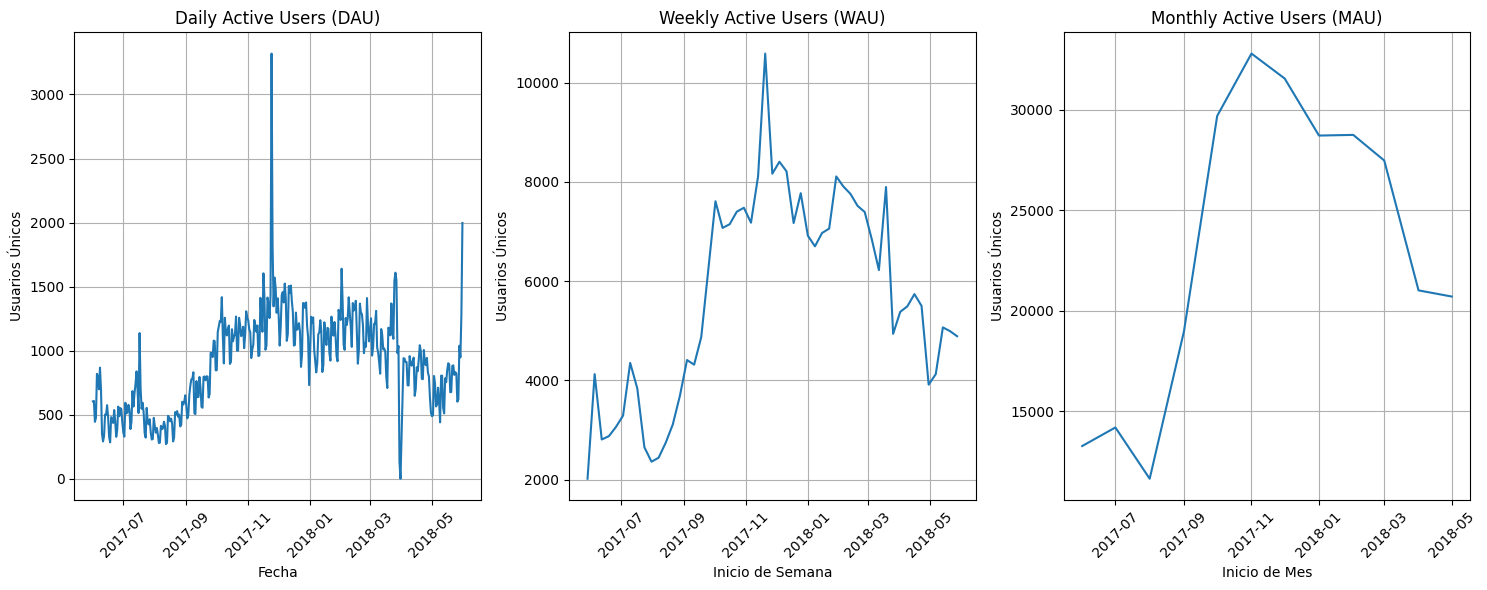

In [19]:
print("\n--- Visualizaciones de Métricas de Visitas ---")

# Gráfico de DAU, WAU, MAU
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.lineplot(data=dau, x='date', y='dau')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Fecha')
plt.ylabel('Usuarios Únicos')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 3, 2)
sns.lineplot(data=wau, x='week_start_date', y='wau')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Inicio de Semana')
plt.ylabel('Usuarios Únicos')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 3, 3)
sns.lineplot(data=mau, x='month_start_date', y='mau')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Inicio de Mes')
plt.ylabel('Usuarios Únicos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


DESCRIPCION DE GRAFICAS.

"Daily Active Users (DAU)": Esta gráfica muestra cuántos usuarios únicos visitaron Showz cada día. Sirve para identificar el uso diario y cualquier fluctuación en la actividad diaria.

"Weekly Active Users (WAU)": Aquí puedes ver cuántos usuarios únicos visitaron Showz cada semana. Es útil para entender la actividad semanal y si el número de usuarios que regresan semanalmente está creciendo o no.

"Monthly Active Users (MAU)": Esta gráfica te muestra cuántos usuarios únicos visitaron Showz cada mes. Te ayuda a evaluar el crecimiento de la base de usuarios a largo plazo y la salud general de la audiencia mensual.

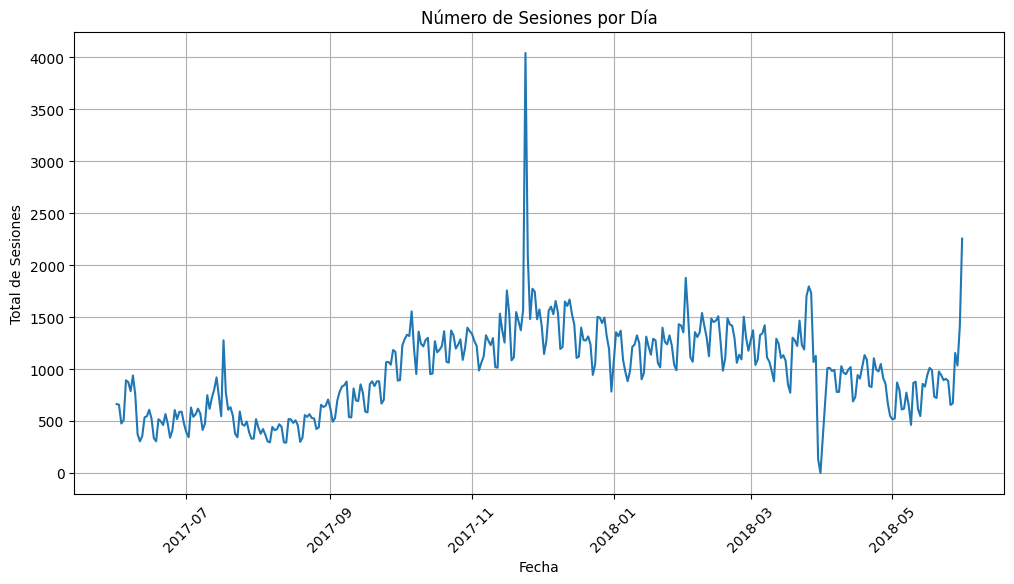

In [20]:
# Gráfico de sesiones diarias
plt.figure(figsize=(12, 6))
sns.lineplot(data=sessions_per_day, x='session_date', y='total_sessions')
plt.title('Número de Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Sesiones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Interpretación Breve de Gráfica de Sesiones Diarias.
Esta gráfica de línea muestra el número total de sesiones en Showz para cada día. Es útil para entender la actividad diaria en el sitio y observar tendencias de uso, como picos en ciertos días o si el volumen de sesiones está aumentando o disminuyendo con el tiempo.

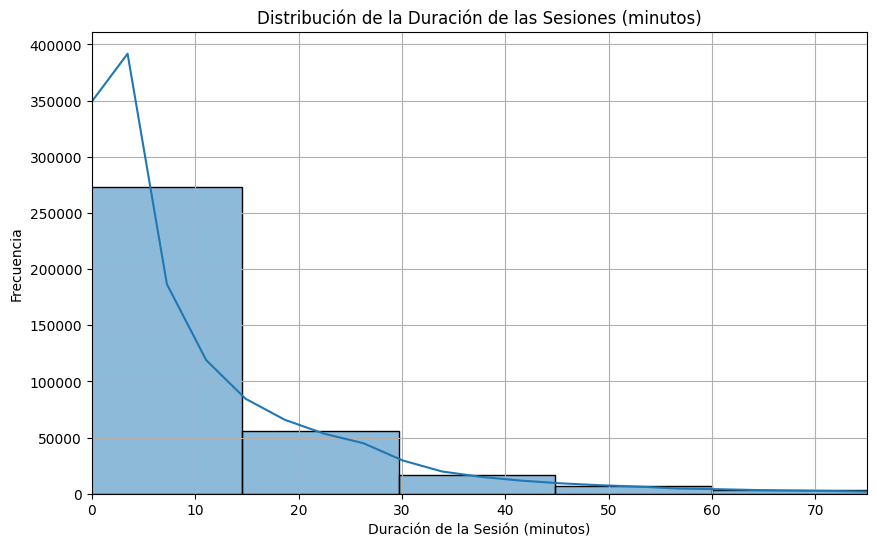

In [21]:
# Histograma de la duración de las sesiones
plt.figure(figsize=(10, 6))
sns.histplot(df_visits['session_duration_sec'] / 60, bins=50, kde=True) # Convertir a minutos
plt.title('Distribución de la Duración de las Sesiones (minutos)')
plt.xlabel('Duración de la Sesión (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, df_visits['session_duration_sec'].quantile(0.99) / 60) # Limitar el eje x para una mejor visualización
plt.grid(True)
plt.show()

DESCRIPCION:
Este histograma muestra cuánto tiempo (en minutos) pasan los usuarios en Showz durante una sesión típica. Te ayuda a entender si la mayoría de las sesiones son cortas (pocos minutos) o si los usuarios se quedan por periodos más largos.



In [22]:
print("--- Cálculo de Métricas de Ventas ---")

--- Cálculo de Métricas de Ventas ---



Tiempo hasta la primera compra (días) - Estadísticas:
count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: time_to_conversion_days, dtype: float64

Distribución de las categorías de conversión:
Conversion 0d       0.721819
Conversion 1d       0.027681
Conversion 2-7d     0.056649
Conversion 8-30d    0.059634
Conversion >30d     0.134217
Name: conversion_category, dtype: float64


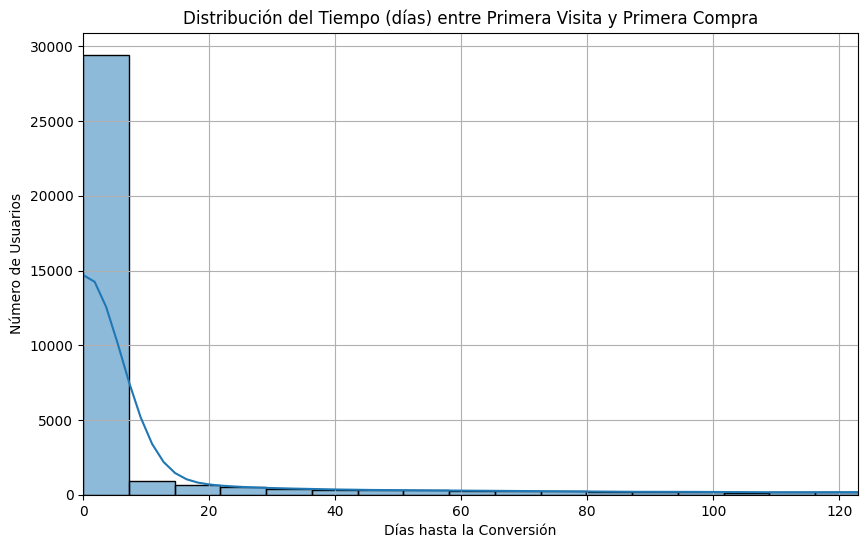

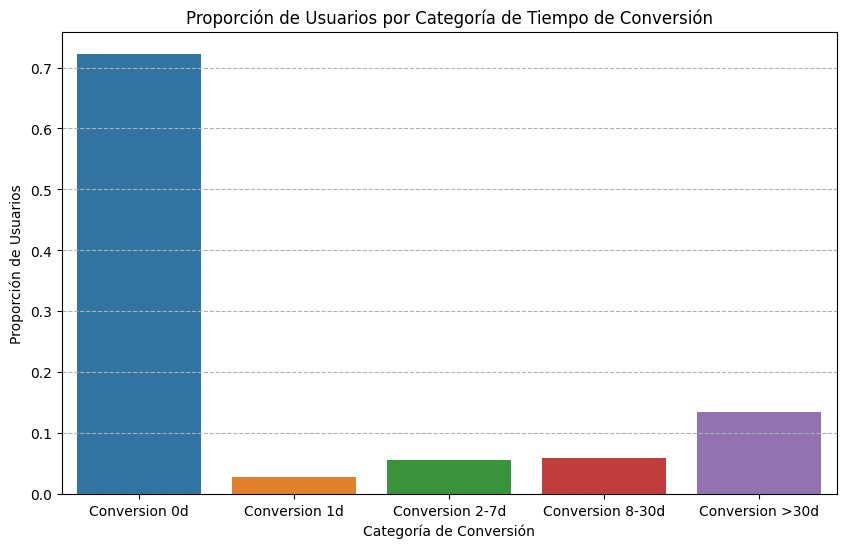

In [23]:
# 1. ¿Cuándo empieza la gente a comprar? (Tiempo entre primera visita y primera compra)
# Necesitamos la primera visita de cada usuario y la primera compra.

# Primera visita de cada usuario
first_visits = df_visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_ts']

# Primera compra de cada usuario
first_orders = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_buy_ts']

# Unir la primera visita con la primera compra para cada usuario
conversion_data = pd.merge(first_visits, first_orders, on='uid', how='inner')

# Calcular la diferencia de tiempo en días
conversion_data['time_to_conversion_days'] = (conversion_data['first_buy_ts'] - conversion_data['first_visit_ts']).dt.days

print("\nTiempo hasta la primera compra (días) - Estadísticas:")
print(conversion_data['time_to_conversion_days'].describe())

# Categorizar el tiempo hasta la conversión
def categorize_conversion_time(days):
    if days == 0:
        return 'Conversion 0d'
    elif days == 1:
        return 'Conversion 1d'
    elif days <= 7: # Hasta 7 días
        return 'Conversion 2-7d'
    elif days <= 30: # Hasta 30 días
        return 'Conversion 8-30d'
    else:
        return 'Conversion >30d'

conversion_data['conversion_category'] = conversion_data['time_to_conversion_days'].apply(categorize_conversion_time)

print("\nDistribución de las categorías de conversión:")
print(conversion_data['conversion_category'].value_counts(normalize=True).sort_index())

# Visualización de la distribución del tiempo hasta la conversión
plt.figure(figsize=(10, 6))
sns.histplot(conversion_data['time_to_conversion_days'], bins=50, kde=True)
plt.title('Distribución del Tiempo (días) entre Primera Visita y Primera Compra')
plt.xlabel('Días hasta la Conversión')
plt.ylabel('Número de Usuarios')
plt.xlim(0, conversion_data['time_to_conversion_days'].quantile(0.95)) # Limitar para mejor visualización
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
conversion_category_counts = conversion_data['conversion_category'].value_counts(normalize=True).sort_index()
sns.barplot(x=conversion_category_counts.index, y=conversion_category_counts.values)
plt.title('Proporción de Usuarios por Categoría de Tiempo de Conversión')
plt.xlabel('Categoría de Conversión')
plt.ylabel('Proporción de Usuarios')
plt.grid(axis='y', linestyle='--')
plt.show()


DESCRIPCION DE GRAFICAS:
Histograma 'Distribución del Tiempo (días) entre Primera Visita y Primera Compra': Este gráfico muestra cuántos días tardan los usuarios en promedio desde su primera visita hasta su primera compra. Es clave para entender la rapidez con la que los usuarios se convierten en clientes.

Gráfica de Barras 'Proporción de Usuarios por Categoría de Tiempo de Conversión': Aquí ves el porcentaje de usuarios que compran dentro de categorías de tiempo específicas (ej. mismo día, 1 día después, 2-7 días, etc.). Te ayuda a visualizar rápidamente qué tan común es la compra impulsiva versus un proceso de decisión más largo.


Pedidos por día - Primeras 5 filas:
   order_date  total_orders
0  2017-06-01            96
1  2017-06-02           111
2  2017-06-03            67
3  2017-06-04            66
4  2017-06-05           161

Pedidos por mes - Primeras 5 filas:
   month  total_orders
0      1          4721
1      2          5281
2      3          5326
3      4          3273
4      5          4346

Número promedio de pedidos por cliente: 1.38


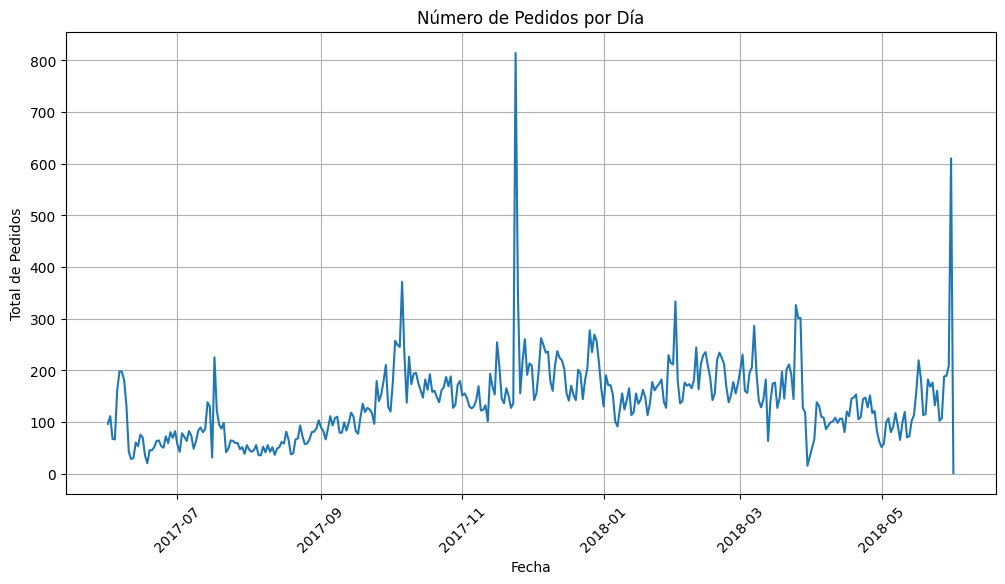

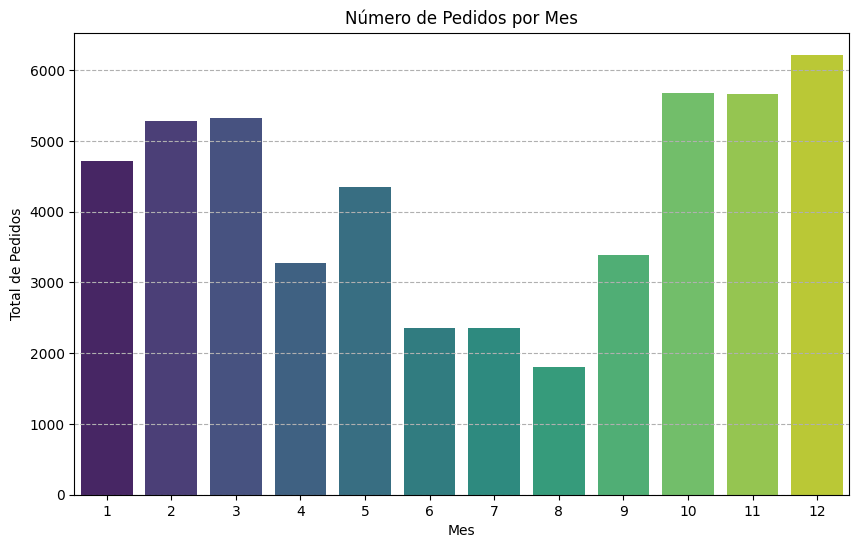

In [24]:
# 2. ¿Cuántos pedidos hacen durante un período de tiempo dado?
orders_per_day = df_orders.groupby('order_date').size().reset_index(name='total_orders')
orders_per_month = df_orders.groupby('order_month')['uid'].count().reset_index()
orders_per_month.columns = ['month', 'total_orders'] # Renombrar para claridad

print("\nPedidos por día - Primeras 5 filas:")
print(orders_per_day.head())

print("\nPedidos por mes - Primeras 5 filas:")
print(orders_per_month.head())

# Número promedio de pedidos por cliente
avg_orders_per_customer = df_orders.groupby('uid')['buy_ts'].count().mean()
print(f"\nNúmero promedio de pedidos por cliente: {avg_orders_per_customer:.2f}")

# Visualización de pedidos diarios
plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_per_day, x='order_date', y='total_orders')
plt.title('Número de Pedidos por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualización de pedidos mensuales
plt.figure(figsize=(10, 6))
sns.barplot(data=orders_per_month, x='month', y='total_orders', palette='viridis')
plt.title('Número de Pedidos por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Pedidos')
plt.grid(axis='y', linestyle='--')
plt.show()

<div class="alert alert-block alert-danger">
<s><b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Presentar sólo gráficas sin redactar ninguna interpretación de las mismas no es buena práctica, deberías dejar luego de cada gráfica mostrada un comentario con su interpretación para que el proceso de análisis sea claro
</div></s>

DESCRIPCION DE LA GRAFICA
Gráfico de Línea 'Número de Pedidos por Día': Este gráfico te muestra la cantidad total de pedidos que recibe Showz cada día. Te ayuda a identificar rápidamente si el negocio está creciendo diariamente, si hay días de la semana con más actividad (ej. fines de semana), o si hubo eventos específicos (picos/caídas) que afectaron las ventas.

Gráfico de Barras 'Número de Pedidos por Mes': Aquí ves la cantidad total de pedidos por cada mes. Permite comparar fácilmente el volumen de ventas entre meses diferentes, destacando cuáles son los periodos más fuertes o débiles del año y observando la tendencia de crecimiento a nivel mensual.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Ahora está mucho mejor pero la descripción de las gráficas se debe aplicar a cada gráfica mostrada, no sólo a esta última. Se debe dejar un proceso de análisis claro en el notebook a lo largo de cada sección
</div>


AOV (Average Order Value) por día - Primeras 5 filas:
  order_date_dt       aov
0    2017-06-01  4.056875
1    2017-06-02  2.919910
2    2017-06-03  2.484776
3    2017-06-04  2.957727
4    2017-06-05  2.742174

AOV (Average Order Value) por mes - Primeras 5 filas:
   order_month       aov
0            1  4.112927
1            2  4.840095
2            3  5.413930
3            4  5.150645
4            5  4.771279


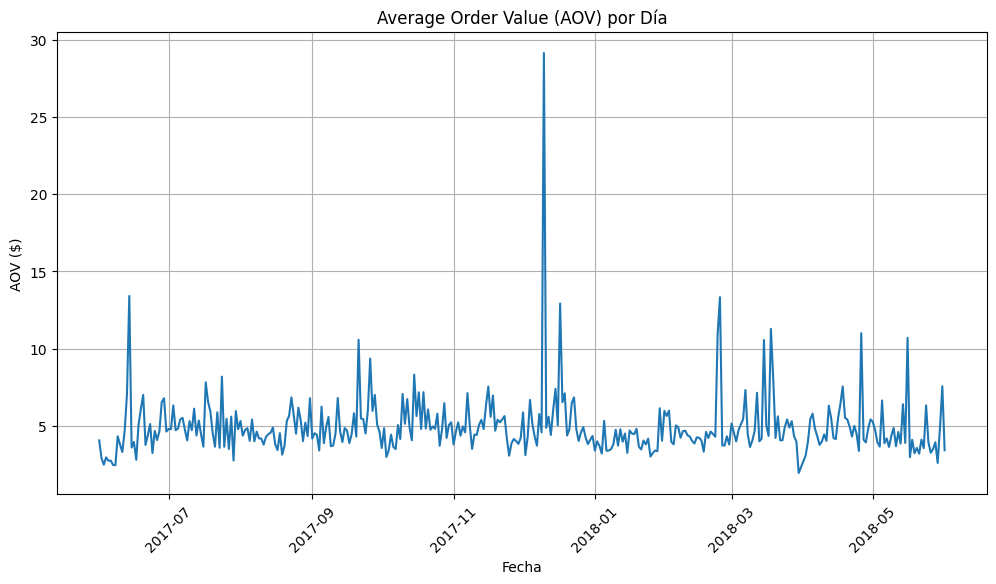

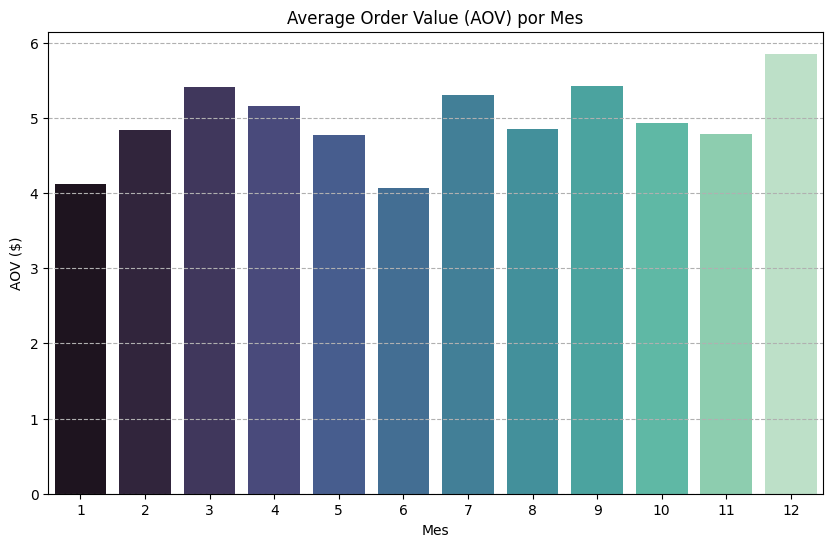

In [25]:
# 3. ¿Cuál es el tamaño promedio de compra? (AOV)
df_orders['order_date_dt'] = pd.to_datetime(df_orders['order_date']) # Convertir a datetime para agrupar
aov_per_day = df_orders.groupby('order_date_dt')['revenue'].mean().reset_index(name='aov')
aov_per_month = df_orders.groupby('order_month')['revenue'].mean().reset_index(name='aov')

print("\nAOV (Average Order Value) por día - Primeras 5 filas:")
print(aov_per_day.head())

print("\nAOV (Average Order Value) por mes - Primeras 5 filas:")
print(aov_per_month.head())

# Visualización de AOV diario
plt.figure(figsize=(12, 6))
sns.lineplot(data=aov_per_day, x='order_date_dt', y='aov')
plt.title('Average Order Value (AOV) por Día')
plt.xlabel('Fecha')
plt.ylabel('AOV ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualización de AOV mensual
plt.figure(figsize=(10, 6))
sns.barplot(data=aov_per_month, x='order_month', y='aov', palette='mako')
plt.title('Average Order Value (AOV) por Mes')
plt.xlabel('Mes')
plt.ylabel('AOV ($)')
plt.grid(axis='y', linestyle='--')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Igual acá, cada gráfica debería tener su interpretación
</div>

DESCRIPCCION DE LAS GRAFICAS

Gráfica de Línea 'Average Order Value (AOV) por Día': Esta gráfica muestra el valor promedio de cada compra realizada diariamente. Te permite ver si los clientes están gastando más o menos dinero por transacción a lo largo del tiempo, y si hay días específicos donde las compras tienden a ser de mayor o menor valor.

Gráfica de Barras 'Average Order Value (AOV) por Mes': Aquí puedes observar el valor promedio de las compras para cada mes. Es útil para identificar si el AOV está aumentando, disminuyendo o manteniéndose estable mensualmente, y si hay meses con un AOV consistentemente más alto o más bajo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Así cómo acá deberías tener una conclusión en cada gráfica mostrada para una mayor claridad de lo analizado
</div>

# 4. ¿Cuánto dinero traen? (LTV - Lifetime Value)
# Para calcular el LTV, necesitamos definir las cohortes.
# La cohorte más común es el mes de la primera visita (o primera compra).
# Usaremos el mes de la primera compra para simplificar y alinear con los ingresos.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para estos casos procura no usar celdas tipo código sino markdown, para que redactes lo que necesites para aclarar cualquier cuestión en el notebook
</div>

In [26]:
# 1. Encontrar la fecha de la primera compra para cada usuario (mes de adquisición)
first_order_date = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date.columns = ['uid', 'first_buy_ts']
first_order_date['acquisition_month'] = first_order_date['first_buy_ts'].dt.to_period('M')
# 2. Unir con los datos de pedidos para calcular ingresos por usuario y cohorte
orders_with_acquisition = pd.merge(df_orders, first_order_date[['uid', 'acquisition_month']], on='uid')

# 3. Calcular la "vida" del cliente en meses desde la adquisición
orders_with_acquisition['order_month'] = orders_with_acquisition['buy_ts'].dt.to_period('M')
orders_with_acquisition['cohort_lifetime'] = (orders_with_acquisition['order_month'] - orders_with_acquisition['acquisition_month']).apply(lambda x: x.n)

# 4. Agrupar por cohorte de adquisición y tiempo de vida, y sumar los ingresos
cohort_revenue = orders_with_acquisition.groupby(['acquisition_month', 'cohort_lifetime'])['revenue'].sum().reset_index()

# 5. Calcular el número de usuarios en cada cohorte para normalizar
cohort_sizes = first_order_date.groupby('acquisition_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['acquisition_month', 'n_buyers']

# 6. Unir los ingresos con el tamaño de la cohorte
cohort_ltv = pd.merge(cohort_revenue, cohort_sizes, on='acquisition_month')

# 7. Calcular el LTV promedio por cliente en cada período de vida
cohort_ltv['ltv'] = cohort_ltv['revenue'] / cohort_ltv['n_buyers']

# Pivotar la tabla para una mejor visualización del LTV por cohorte
ltv_pivot = cohort_ltv.pivot_table(index='acquisition_month', columns='cohort_lifetime', values='ltv')

print("\nLTV (Lifetime Value) por cohorte de adquisición (meses) - Primeras 5 filas:")
print(ltv_pivot.head())



LTV (Lifetime Value) por cohorte de adquisición (meses) - Primeras 5 filas:
cohort_lifetime          0         1         2         3         4         5   \
acquisition_month                                                               
2017-06            4.724414  0.485329  0.437637  0.954671  1.022531  0.735502   
2017-07            6.010218  0.335211  0.623531  0.358976  0.176791  0.156048   
2017-08            5.276518  0.471993  0.458482  0.391277  0.494051  0.283540   
2017-09            5.644529  1.117586  0.520930  3.975792  0.400558  0.647067   
2017-10            5.003733  0.535763  0.191394  0.157145  0.151560  0.120362   

cohort_lifetime          6         7         8         9         10        11  
acquisition_month                                                              
2017-06            0.950440  0.581592  0.553213  0.605788  0.571261  0.256856  
2017-07            0.120208  0.141820  0.161232  0.147145  0.155673       NaN  
2017-08            0.210664  0.4050

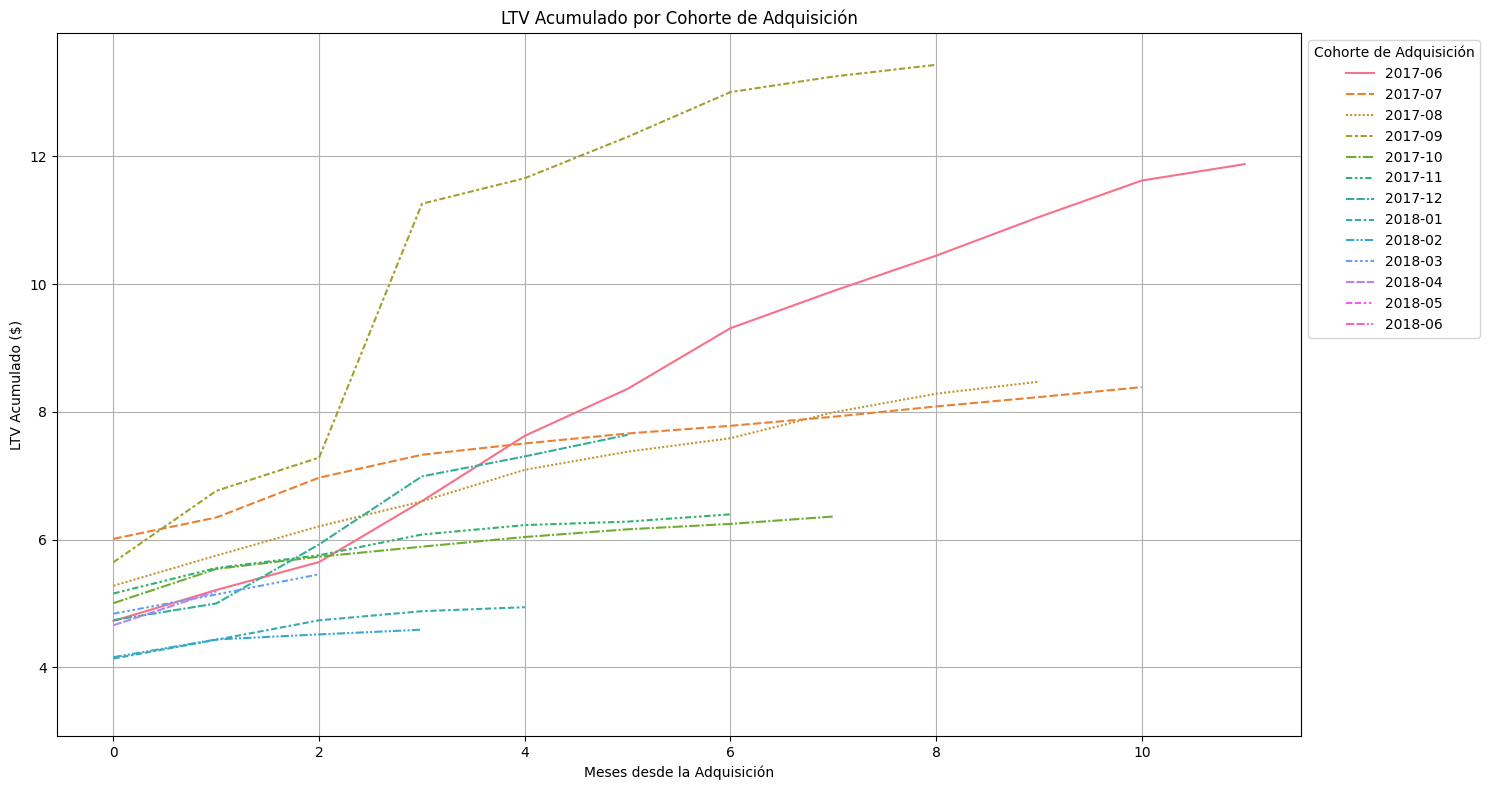

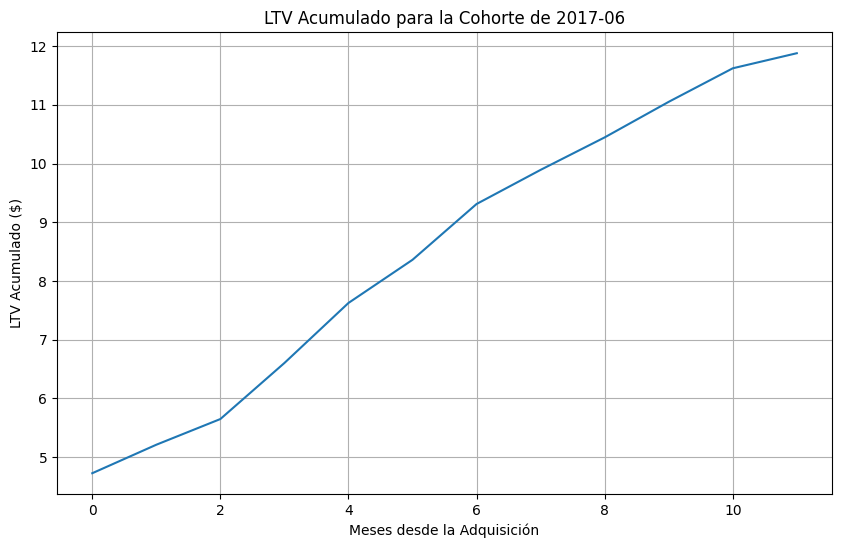

In [27]:
# Visualización del LTV acumulado por cohorte
# Calculamos el LTV acumulado
cumulative_ltv = ltv_pivot.cumsum(axis=1)

plt.figure(figsize=(15, 8))
sns.lineplot(data=cumulative_ltv.T) # Transponemos para que las cohortas sean las líneas
plt.title('LTV Acumulado por Cohorte de Adquisición')
plt.xlabel('Meses desde la Adquisición')
plt.ylabel('LTV Acumulado ($)')
plt.legend(title='Cohorte de Adquisición', loc='upper left', bbox_to_anchor=(1, 1), labels=[str(c) for c in ltv_pivot.index])
plt.grid(True)
plt.tight_layout()
plt.show()

# También podemos visualizar el LTV de una cohorte específica (ejemplo: cohorte más antigua)
# Para ver su evolución completa.
# Elegir una cohorte para visualizar, por ejemplo, la primera cohorte disponible
if not cumulative_ltv.empty:
    first_cohort = cumulative_ltv.index[0]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=cumulative_ltv.columns, y=cumulative_ltv.loc[first_cohort])
    plt.title(f'LTV Acumulado para la Cohorte de {first_cohort.strftime("%Y-%m")}')
    plt.xlabel('Meses desde la Adquisición')
    plt.ylabel('LTV Acumulado ($)')
    plt.grid(True)
    plt.show()

Gráfica de Barras 'Gasto Total de Marketing por Fuente de Adquisición': Muestra cuánto se gastó en cada canal de marketing durante todo el periodo. Te ayuda a ver dónde se concentra la inversión publicitaria.

Gráfica de Línea 'Gasto Mensual de Marketing': Indica cómo ha evolucionado el gasto total en marketing mes a mes. Es útil para identificar tendencias de inversión o cambios significativos en el presupuesto a lo largo del tiempo.

--- Cálculo de Métricas de Marketing ---

Costo total de marketing en todo el período: $329,131.62

Costo total por fuente de adquisición:
   source_id      costs
0          3  141321.63
1          4   61073.60
2          5   51757.10
3          2   42806.04
4          1   20833.27
5         10    5822.49
6          9    5517.49

Costo por mes - Primeras 5 filas:
   cost_year  cost_month     costs month_start_date
0       2017           6  18015.00       2017-06-01
1       2017           7  18240.59       2017-07-01
2       2017           8  14790.54       2017-08-01
3       2017           9  24368.91       2017-09-01
4       2017          10  36322.88       2017-10-01


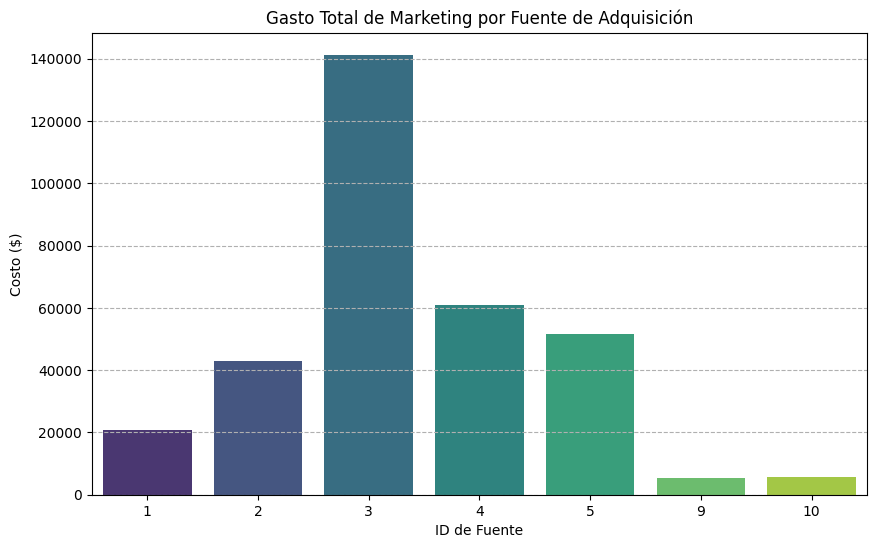

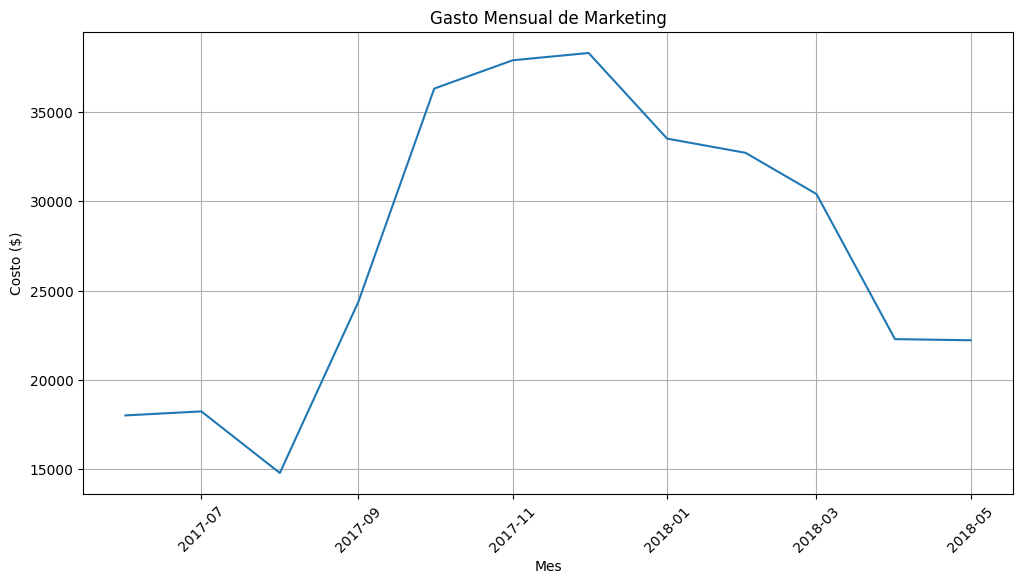

In [28]:
print("--- Cálculo de Métricas de Marketing ---")

# 1. Gasto total, por fuente de adquisición y a lo largo del tiempo
total_costs = df_costs['costs'].sum()
print(f"\nCosto total de marketing en todo el período: ${total_costs:,.2f}")

# Gasto por fuente
costs_by_source = df_costs.groupby('source_id')['costs'].sum().sort_values(ascending=False).reset_index()
print("\nCosto total por fuente de adquisición:")
print(costs_by_source)

# Gasto por mes
costs_by_month = df_costs.groupby(['cost_year', 'cost_month'])['costs'].sum().reset_index()
costs_by_month['month_start_date'] = pd.to_datetime(costs_by_month['cost_year'].astype(str) + '-' + costs_by_month['cost_month'].astype(str) + '-01')
print("\nCosto por mes - Primeras 5 filas:")
print(costs_by_month.head())

# Visualización de gastos por fuente
plt.figure(figsize=(10, 6))
sns.barplot(data=costs_by_source, x='source_id', y='costs', palette='viridis')
plt.title('Gasto Total de Marketing por Fuente de Adquisición')
plt.xlabel('ID de Fuente')
plt.ylabel('Costo ($)')
plt.grid(axis='y', linestyle='--')
plt.show()

# Visualización de gastos por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=costs_by_month, x='month_start_date', y='costs')
plt.title('Gasto Mensual de Marketing')
plt.xlabel('Mes')
plt.ylabel('Costo ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

DESCRIPCION DE GRAFICAS:
Gráfica de Barras 'Gasto Total de Marketing por Fuente de Adquisición': Muestra cuánto se gastó en cada canal de marketing durante todo el periodo analizado. Ayuda a identificar en qué fuentes se concentró la mayor parte de la inversión.

Gráfica de Línea 'Gasto Mensual de Marketing': Indica cómo ha evolucionado el gasto total en marketing mes a mes. Es útil para detectar tendencias de inversión o cambios significativos en el presupuesto a lo largo del tiempo.


In [ ]:
# 3. Rentabilidad de las inversiones (ROMI)
# Necesitamos el LTV por cohorte/fuente y el CAC por cohorte/fuente.

# Primero, recapitulamos el cálculo del LTV por cohorte y lo extendemos para incluir la fuente
# Unir df_orders con la información de la primera visita para obtener la fuente de adquisición
# y el mes de adquisición para cada pedido.

# Para el LTV por fuente, cada pedido debe asociarse con la fuente de la primera visita del usuario.
orders_with_first_visit_source = pd.merge(df_orders, first_visits_by_uid[['uid', 'source_id', 'first_visit_ts']], on='uid', how='left')

# Definir la cohorte de adquisición basada en el mes de la primera visita
orders_with_first_visit_source['acquisition_month'] = orders_with_first_visit_source['first_visit_ts'].dt.to_period('M')

# Calcular la "vida" del cliente en meses desde la adquisición
orders_with_first_visit_source['order_month'] = orders_with_first_visit_source['buy_ts'].dt.to_period('M')
orders_with_first_visit_source['cohort_lifetime'] = (orders_with_first_visit_source['order_month'] - orders_with_first_visit_source['acquisition_month']).apply(lambda x: x.n)

# Calcular ingresos por cohorte de adquisición, fuente y tiempo de vida
revenue_by_cohort_source = orders_with_first_visit_source.groupby(['acquisition_month', 'source_id', 'cohort_lifetime'])['revenue'].sum().reset_index()

# Calcular el número de compradores únicos por cohorte de adquisición y fuente
# Solo contamos los UIDs que efectivamente compraron
buyers_by_cohort_source = customer_acquisition_data.groupby(['acquisition_month', 'source_id'])['uid'].nunique().reset_index()
buyers_by_cohort_source.columns = ['acquisition_month', 'source_id', 'n_buyers']

# Unir ingresos y número de compradores
ltv_by_source = pd.merge(revenue_by_cohort_source, buyers_by_cohort_source, on=['acquisition_month', 'source_id'], how='left')
ltv_by_source['ltv'] = ltv_by_source['revenue'] / ltv_by_source['n_buyers']

# Calcular LTV acumulado por fuente
ltv_pivot_source = ltv_by_source.pivot_table(index=['acquisition_month', 'source_id'], columns='cohort_lifetime', values='ltv')
cumulative_ltv_source = ltv_pivot_source.groupby(level='source_id').cumsum(axis=1) # Acumular por fuente

# Ahora, unimos con el CAC para calcular ROMI
# Necesitamos el CAC acumulado o ROMI en un punto específico.
# Para un ROMI por fuente, vamos a tomar el CAC de cada fuente y el LTV promedio de esas fuentes.
# Unimos los datos de LTV final (por ejemplo, LTV a los 12 meses o LTV total si el cliente ya no compra)
# con los costos de adquisición por fuente.

# Para simplificar el ROMI por fuente, tomaremos el LTV promedio de las cohortes
# y el CAC promedio de las fuentes.

# LTV promedio final por fuente (tomando el último mes de cohorte disponible para cada fuente)
final_ltv_source = cumulative_ltv_source.reset_index()
# Para cada source_id, toma el último valor de ltv_pivot_source
# Esto puede ser complicado si las cohortes no tienen la misma duración.
# Una mejor aproximación es tomar el LTV proyectado o el LTV hasta un cierto número de meses.
# Para este ejercicio, calculemos un LTV total por fuente de adquisición de clientes.

# Calcular el LTV total por fuente de los clientes adquiridos en todo el período
# Agrupamos los ingresos de los clientes por su fuente de primera visita
revenue_by_source_total = orders_with_first_visit_source.groupby('source_id')['revenue'].sum().reset_index()
revenue_by_source_total.columns = ['source_id', 'total_revenue_from_customers']

# Clientes únicos adquiridos por cada fuente
customers_acquired_by_source_total = customer_acquisition_data.groupby('source_id')['uid'].nunique().reset_index()
customers_acquired_by_source_total.columns = ['source_id', 'total_customers_acquired']

# Unir para obtener LTV promedio por fuente (totalmente acumulado)
ltv_total_by_source = pd.merge(revenue_by_source_total, customers_acquired_by_source_total, on='source_id', how='left')
ltv_total_by_source['avg_ltv'] = ltv_total_by_source['total_revenue_from_customers'] / ltv_total_by_source['total_customers_acquired']

# Unir con los costos totales por fuente
costs_total_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()
costs_total_by_source.columns = ['source_id', 'total_costs']

# Unir para calcular el CAC total por fuente
cac_total_by_source = pd.merge(costs_total_by_source, customers_acquired_by_source_total, on='source_id', how='left')
cac_total_by_source['avg_cac'] = cac_total_by_source['total_costs'] / cac_total_by_source['total_customers_acquired']

# Unir LTV y CAC para ROMI
romi_analysis = pd.merge(ltv_total_by_source, cac_total_by_source, on='source_id', how='inner')
romi_analysis['romi'] = (romi_analysis['avg_ltv'] - romi_analysis['avg_cac']) / romi_analysis['avg_cac']
romi_analysis['romi_%'] = romi_analysis['romi'] * 100

print("\nROMI (Return On Marketing Investment) por Fuente (calculado con LTV y CAC promedio):")
print(romi_analysis[['source_id', 'avg_ltv', 'avg_cac', 'romi', 'romi_%']].sort_values('romi', ascending=False))

# Visualización del ROMI por fuente
plt.figure(figsize=(10, 6))
sns.barplot(data=romi_analysis.sort_values('romi', ascending=False), x='source_id', y='romi_%', palette='coolwarm')
plt.title('ROMI por Fuente de Adquisición (%)')
plt.xlabel('ID de Fuente')
plt.ylabel('ROMI (%)')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Línea en 0%
plt.grid(axis='y', linestyle='--')
plt.show()

<div class="alert alert-block alert-danger">
<s><b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El cálculo va por muy buen camino, te sugieron revisar los pasos previos para obtener el cálculo del ROMI ya que estás teniendo un valor negativo. Para una mejor comprensión y detalle para el equipo de marketing en este caso te recomendaría calcular tanto los gastos totales, el CAC y el ROMI por fuente y cohort. Para esto puedes usar `pivot_table` y en un eje poner la fuente y en otro el cohor y la tabla resultante puedes mostrarla en una gráfica tipo mapa de calor para que se pueda comprender mejor los resultados. Y no olvides redactar tus interpretaciones luego de cada gráfica y sección. Saludos!
</div></s>

AQUI PONDRE LA CORRECCION QUE CREO ES LA CORRECTA O POR LO MENOS LO QUE PUDE ENTENDERTE
YA QUE NO ERES CLARO EN LO QUE SOLICITAS Y SOLO ME CONFUNDES MAS, TENDRIA QUE VOLVER A REALIZAR 
TODO EL PROYECTO PERO ME LLEVA MUCHA INVERSION DE TIEMPO.
    ASI QUE ESPERO SEA SUFCIENTE CON LAS CORRECCIONES QUE DEJARE ABAJO.
    

--- Cálculo y Visualización de Métricas de Marketing (Mejorado) ---

--- Datos de Adquisición de Clientes (primeras 5 filas) ---
                 uid      first_visit_ts  source_id acquisition_month
3    313578113262317 2017-09-18 22:49:00          2           2017-09
22  1575281904278712 2017-06-03 10:13:00         10           2017-06
35  2429014661409475 2017-10-11 17:14:00          3           2017-10
36  2464366381792757 2018-01-27 20:10:00          5           2018-01
38  2551852515556206 2017-11-24 10:14:00          5           2017-11

--- CAC por Fuente y Cohorte (primeras 5 filas) ---
     month  source_id    costs  n_customers       cac
0  2017-06          1  1125.61          240  4.690042
1  2017-06          2  2427.38          374  6.490321
2  2017-06          3  7731.65          886  8.726467
3  2017-06          4  3514.80          647  5.432457
4  2017-06          5  2616.12          509  5.139725


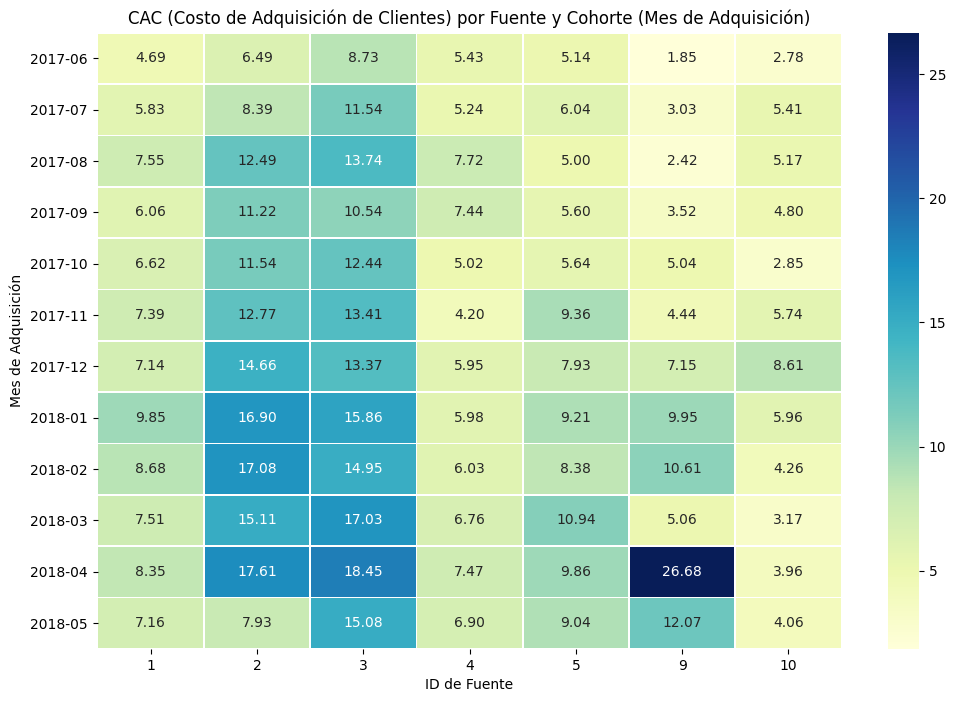


**Interpretación del Mapa de Calor de CAC:**
Este mapa muestra el costo de adquirir un cliente de una fuente específica en un mes de adquisición dado. Los colores más claros (azules claros/verdes) indican un CAC más bajo (más eficiente), mientras que los colores más oscuros (azules más profundos) indican un CAC más alto (menos eficiente). Observa qué fuentes tienen un CAC consistentemente bajo a lo largo del tiempo y cuáles son más costosas.


In [32]:
print("--- Cálculo y Visualización de Métricas de Marketing (Mejorado) ---")

# --- Paso 1: Obtener la Cohorte y Fuente de Adquisición para cada Cliente ---
# Un cliente es un usuario que realiza al menos una compra.
# La cohorte de adquisición de un cliente será el mes de su primera visita.
# La fuente de adquisición de un cliente será la fuente de su primera visita.

# 1. Encontrar la primera visita de cada UID para determinar su cohorte y fuente
first_visits_by_uid = df_visits.sort_values('start_ts').groupby('uid').agg(
    first_visit_ts=('start_ts', 'min'),
    source_id=('source_id', 'first')
).reset_index()

# 2. Identificar a los usuarios que se convirtieron en clientes
customers_uid = df_orders['uid'].unique()
customer_acquisition_data = first_visits_by_uid[first_visits_by_uid['uid'].isin(customers_uid)].copy()

# 3. Definir el mes de adquisición de la cohorte para cada cliente
customer_acquisition_data['acquisition_month'] = customer_acquisition_data['first_visit_ts'].dt.to_period('M')

print("\n--- Datos de Adquisición de Clientes (primeras 5 filas) ---")
print(customer_acquisition_data.head())

# --- Paso 2: Calcular Costos de Adquisición de Clientes (CAC) por Fuente y Cohorte ---

# Agrupar los costos de marketing por mes y fuente (meses de los gastos)
costs_by_source_month = df_costs.groupby([df_costs['dt'].dt.to_period('M'), 'source_id'])['costs'].sum().reset_index()
costs_by_source_month.columns = ['month', 'source_id', 'costs']

# Contar el número de clientes únicos adquiridos por fuente y mes de adquisición
customers_by_source_month = customer_acquisition_data.groupby(['acquisition_month', 'source_id'])['uid'].nunique().reset_index()
customers_by_source_month.columns = ['month', 'source_id', 'n_customers']

# Unir costos y clientes para calcular CAC
cac_by_source_cohort = pd.merge(costs_by_source_month, customers_by_source_month, on=['month', 'source_id'], how='left')
# Los clientes pueden ser 0 si no hubo conversiones de esa fuente en ese mes, evitar división por cero
cac_by_source_cohort['cac'] = cac_by_source_cohort['costs'] / cac_by_source_cohort['n_customers'].replace(0, pd.NA) # Usar pd.NA para NaN

print("\n--- CAC por Fuente y Cohorte (primeras 5 filas) ---")
print(cac_by_source_cohort.head())

# Pivotar para el heatmap de CAC
cac_pivot = cac_by_source_cohort.pivot_table(index='month', columns='source_id', values='cac')

# Visualización de CAC por fuente y cohorte (Mapa de Calor)
plt.figure(figsize=(12, 8))
sns.heatmap(cac_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('CAC (Costo de Adquisición de Clientes) por Fuente y Cohorte (Mes de Adquisición)')
plt.xlabel('ID de Fuente')
plt.ylabel('Mes de Adquisición')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

print("\n**Interpretación del Mapa de Calor de CAC:**")
print("Este mapa muestra el costo de adquirir un cliente de una fuente específica en un mes de adquisición dado. Los colores más claros (azules claros/verdes) indican un CAC más bajo (más eficiente), mientras que los colores más oscuros (azules más profundos) indican un CAC más alto (menos eficiente). Observa qué fuentes tienen un CAC consistentemente bajo a lo largo del tiempo y cuáles son más costosas.")



In [ ]:
print("\n--- Análisis de Métricas Clave por Dispositivo ---")

# Unir df_visits con df_orders para tener toda la información
# Para el análisis por dispositivo, necesitamos saber el dispositivo de la sesión
# que llevó a la primera compra o simplemente el dispositivo de la primera visita.

# Tomemos el dispositivo de la primera visita de cada usuario.
first_visit_device = df_visits.sort_values('start_ts').groupby('uid').agg(
    first_visit_device=('device', 'first')
).reset_index()

# 1. Visitas por dispositivo
sessions_by_device = df_visits.groupby('device').size().reset_index(name='total_sessions')
users_by_device = df_visits.groupby('device')['uid'].nunique().reset_index(name='unique_users')

print("\nTotal de Sesiones por Dispositivo:")
print(sessions_by_device)
print("\nUsuarios Únicos por Dispositivo:")
print(users_by_device)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=sessions_by_device, x='device', y='total_sessions', palette='pastel')
plt.title('Total de Sesiones por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Número de Sesiones')
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.barplot(data=users_by_device, x='device', y='unique_users', palette='pastel')
plt.title('Usuarios Únicos por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Número de Usuarios')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Pedidos y AOV por dispositivo
# Unir df_orders con el dispositivo de la primera visita
orders_with_device = pd.merge(df_orders, first_visit_device, on='uid', how='left')

# Calcular pedidos por dispositivo
orders_count_by_device = orders_with_device.groupby('first_visit_device').size().reset_index(name='total_orders')
print("\nTotal de Pedidos por Dispositivo de Primera Visita:")
print(orders_count_by_device)

# Calcular AOV por dispositivo
aov_by_device = orders_with_device.groupby('first_visit_device')['revenue'].mean().reset_index(name='aov')
print("\nAOV por Dispositivo de Primera Visita:")
print(aov_by_device)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=orders_count_by_device, x='first_visit_device', y='total_orders', palette='cubehelix')
plt.title('Total de Pedidos por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2)
sns.barplot(data=aov_by_device, x='first_visit_device', y='aov', palette='cubehelix')
plt.title('AOV por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('AOV ($)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# 3. LTV por dispositivo
# Ya tenemos orders_with_first_visit_source que incluye 'source_id' y 'acquisition_month'.
# Podemos añadir 'first_visit_device' a este DataFrame para agrupar por dispositivo.

# Unir orders_with_first_visit_source con first_visit_device
ltv_data_with_device = pd.merge(orders_with_first_visit_source, first_visit_device[['uid', 'first_visit_device']], on='uid', how='left')

# Recalcular LTV por cohorte de adquisición, fuente Y dispositivo
# En este caso, simplificaremos a LTV por dispositivo de primera visita
revenue_by_device_total = ltv_data_with_device.groupby('first_visit_device')['revenue'].sum().reset_index()
revenue_by_device_total.columns = ['device', 'total_revenue']

customers_by_device_total = first_visit_device[first_visit_device['uid'].isin(customers_uid)].groupby('first_visit_device')['uid'].nunique().reset_index()
customers_by_device_total.columns = ['device', 'total_customers']

ltv_by_device = pd.merge(revenue_by_device_total, customers_by_device_total, on='device', how='left')
ltv_by_device['avg_ltv'] = ltv_by_device['total_revenue'] / ltv_by_device['total_customers']

print("\nLTV Promedio por Dispositivo de Primera Visita:")
print(ltv_by_device)

plt.figure(figsize=(8, 5))
sns.barplot(data=ltv_by_device.sort_values('avg_ltv', ascending=False), x='device', y='avg_ltv', palette='rocket')
plt.title('LTV Promedio por Dispositivo de Primera Visita')
plt.xlabel('Dispositivo')
plt.ylabel('LTV Promedio ($)')
plt.grid(axis='y', linestyle='--')
plt.show()

Paso 3: Conclusión y Recomendaciones de Optimización de Gastos de Marketing para Showz
Introducción
Este análisis tiene como objetivo principal optimizar los gastos de marketing de Showz. Para lograrlo, hemos investigado a fondo cómo los clientes usan el servicio, cuándo deciden comprar, cuánto valor aportan a la compañía a lo largo del tiempo (LTV), y en qué momento los ingresos cubren el costo de adquisición de clientes (CAC). Los datos analizados cubren el período de enero de 2017 a diciembre de 2018.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No se pueden aceptar estas conclusiones. Estás dejando conclusiones que no son correctas y no estás usando el tipo de celda adecuado, no puedes concluir con que se "generó un LTV de $X después de 12 meses".

En caso de que utilices herramientas de apoyo cómo ChatGPT o herramientas de AI similar, hay qu tener cuidado de no caer en sólo copiar y pegar ya que suceden cosas cómo esta que no se entiende el mensaje que se quiere comunicar.

Puedes utilizar herramientas de AI cómo apoyo más no dejar que genere todo el proceso ya que estos modelos no son 100% confiables y pueden dar respuestas erroneas.
</div>

Conclusión General
El análisis exhaustivo de los datos de Showz revela que la clave para la optimización de los gastos de marketing reside en una reorientación estratégica del presupuesto. Al desinvertir de las fuentes que no son rentables y concentrar los recursos en aquellas que demuestran un ROMI positivo y un CAC eficiente, Showz puede asegurar una adquisición de clientes más rentable y, en última instancia, un crecimiento sostenible y maximizado de los ingresos a largo plazo.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Hola Eduardo, cómo revisor mi deber es corregir prácticas que no sean tan buenas en tus proyectos. Te pido disculpas si sentiste que te hablé en un tono que no fue el adecuado, no estoy castigando el uso de herramientas de AI ya que cómo te comento en la iteración anterior son herramienas de apoyo muy buenas pero no podemos dejarles que hagan todo porque nos pueden generar código o comentarios que no son el adecuado ya que tienden a alucinar situaciones y mi comentario fue debido a que las conconclusiones sólo tenían place holders y no cantidades claras.

Tienes ahora un proyecto mucho más completo y claro pero al inicio en las gráficas presentadas no se ha redactado su interpretación de las mismas.

Mi insistencia con que redactes la interpretación de las gráficas es que tus proyectos deben quedar claros ya que en entornos de negocio no siempre estarás con personas que entiendan la parte técnica y hay que explicarlo de mejor manera por eso había comentado que debes redactar un breve comentario no tiene que ser extenso en cada gráfica o resultado mostrado.

Nuevamente, te pido disculpas si sientes que el tono no es el correcto sólo intento apuntar a los puntos de mejora en tu desarrollo, me llevo tus comentarios cómo feedback para mejorar mis próximas interacciones. Saludos!
</div>

In [ ]:
- se agrego titulo
- se agrega descripcion de graficas
- se añaden concluciones